Need to restart the kernal to run each pollutant.

In [27]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import tensorflow as tf
from tensorflow import keras

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

In [28]:
#import dataset
data = pd.read_csv("data.csv")
data = np.array(data)

# RF_PM 2.5

In [14]:
#define train and test
# 80% for train and 20% for test
train_data = data[0:int(len(data)*0.8),9:13]
train_labels = data[0:int(len(data)*0.8),2]
test_data = data[int(len(data)*0.8):int(len(data)),9:13]
test_labels = data[int(len(data)*0.8):int(len(data)),2]

train_data = np.array(train_data, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print("Training set: {}".format(train_data.shape))  # 7008 examples, 4 features
print("Testing set:  {}".format(test_data.shape))   # 1752 examples, 4 features

Training set: (7008, 4)
Testing set:  (1752, 4)


In [15]:
column_names = ['windspeedKmph', 'winddirdegree', 'tempC', 'humidity']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,windspeedKmph,winddirdegree,tempC,humidity
0,3.0,253.0,8.0,85.0
1,4.0,275.0,7.0,83.0
2,5.0,298.0,7.0,81.0
3,6.0,320.0,7.0,80.0
4,6.0,325.0,7.0,79.0


## 1. Build the model

In [16]:
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':700,
              'criterion':'mse', 
              #'ccp_alpha':0.001,
              'max_depth': 10,
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True,
              'max_features':None}

In [17]:
model = RandomForestRegressor(**params_rfr)

In [18]:
%%time
model.fit(train_data, train_labels)

/Users/yangruoxi/opt/anaconda3/envs/keras/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 4.19 s, sys: 42.4 ms, total: 4.23 s
Wall time: 4.24 s


RandomForestRegressor(criterion='mse', max_depth=10, max_features=None,
                      n_estimators=700)

## 2. Predict

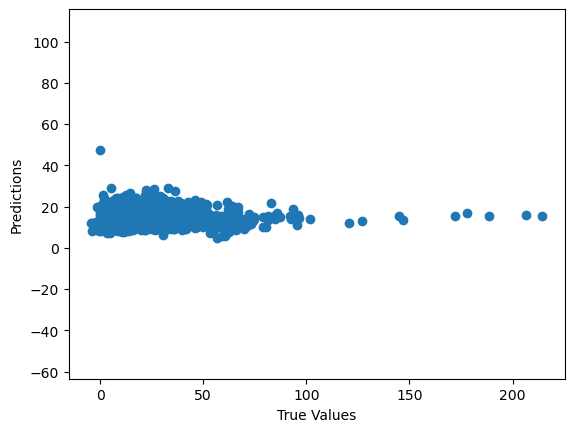

In [19]:
test_predictions = model.predict(test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()
#_ = plt.plot([-100, 100], [-100, 100])

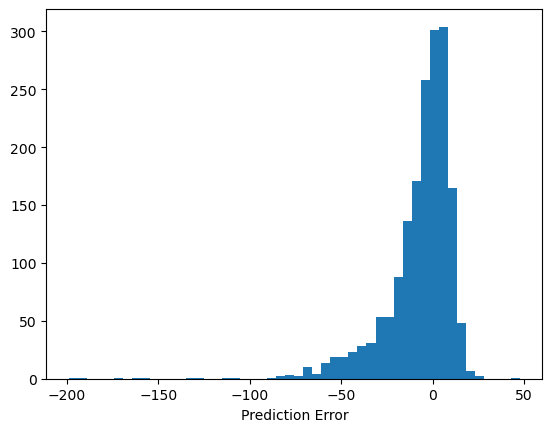

In [20]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()
#_ = plt.ylabel("Count")

In [21]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 451.2264688787313


In [22]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

-0.15834098353578296

## 3. Feature importantce

In [23]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

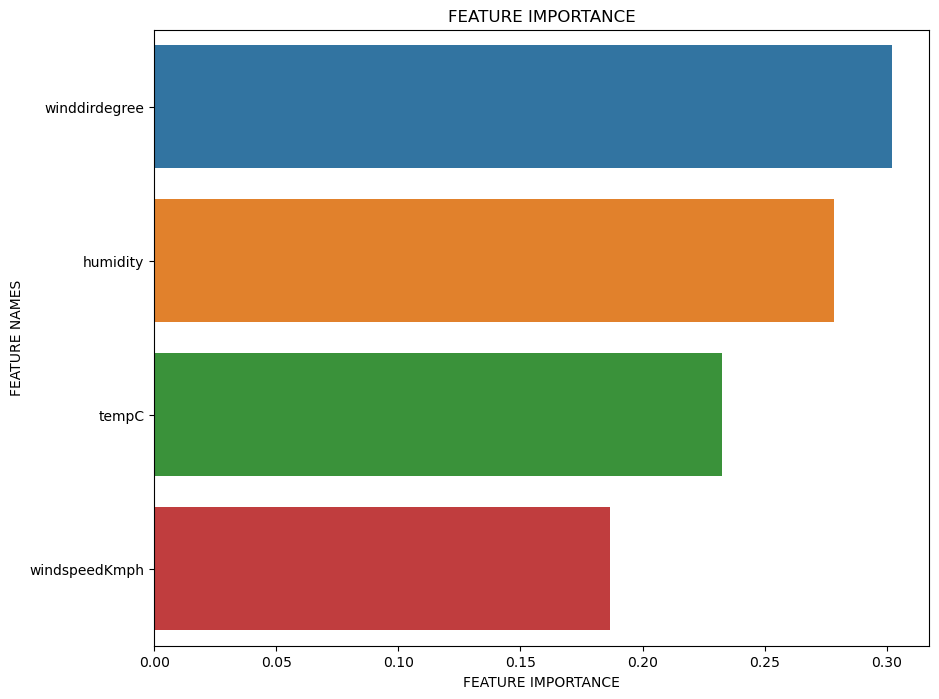

In [24]:
plot_feature_importance(model.feature_importances_, df.columns)

# RF_NOx

In [3]:
#define train and test
# 80% for train and 20% for test
train_data = data[0:int(len(data)*0.8),9:13]
train_labels = data[0:int(len(data)*0.8),3]
test_data = data[int(len(data)*0.8):int(len(data)),9:13]
test_labels = data[int(len(data)*0.8):int(len(data)),3]

train_data = np.array(train_data, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print("Training set: {}".format(train_data.shape))  # 7008 examples, 4 features
print("Testing set:  {}".format(test_data.shape))   # 1752 examples, 4 features

Training set: (7008, 4)
Testing set:  (1752, 4)


In [20]:
column_names = ['windspeedKmph', 'winddirdegree', 'tempC', 'humidity']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,windspeedKmph,winddirdegree,tempC,humidity
0,3.0,253.0,8.0,85.0
1,4.0,275.0,7.0,83.0
2,5.0,298.0,7.0,81.0
3,6.0,320.0,7.0,80.0
4,6.0,325.0,7.0,79.0


## 1. Build the model

In [23]:
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':700,
              'criterion':'mse', 
              #'ccp_alpha':0.001,
              'max_depth': 10,
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True,
              'max_features':None}

In [7]:
model = RandomForestRegressor(**params_rfr)

In [10]:
%%time
model.fit(train_data, train_labels)

/Users/yangruoxi/opt/anaconda3/envs/keras/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 4.18 s, sys: 40.3 ms, total: 4.22 s
Wall time: 4.22 s


RandomForestRegressor(criterion='mse', max_depth=10, max_features=None,
                      n_estimators=700)

## 2. Predict

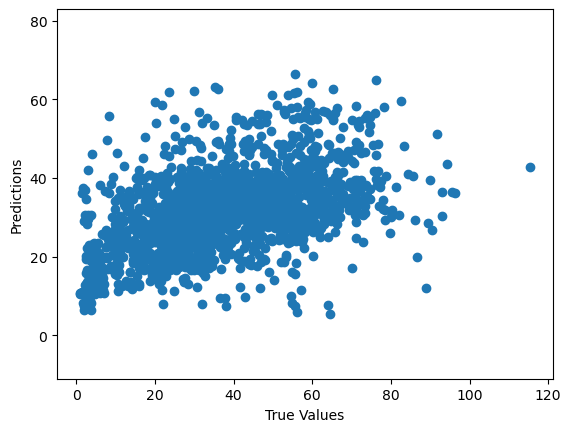

In [11]:
test_predictions = model.predict(test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()
#_ = plt.plot([-100, 100], [-100, 100])

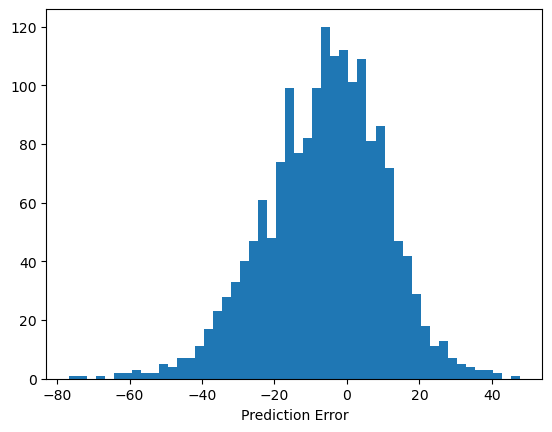

In [12]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()
#_ = plt.ylabel("Count")

In [13]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 310.98141222548503


In [24]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

0.13106828724030162

## 3. Feature importantce

In [21]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

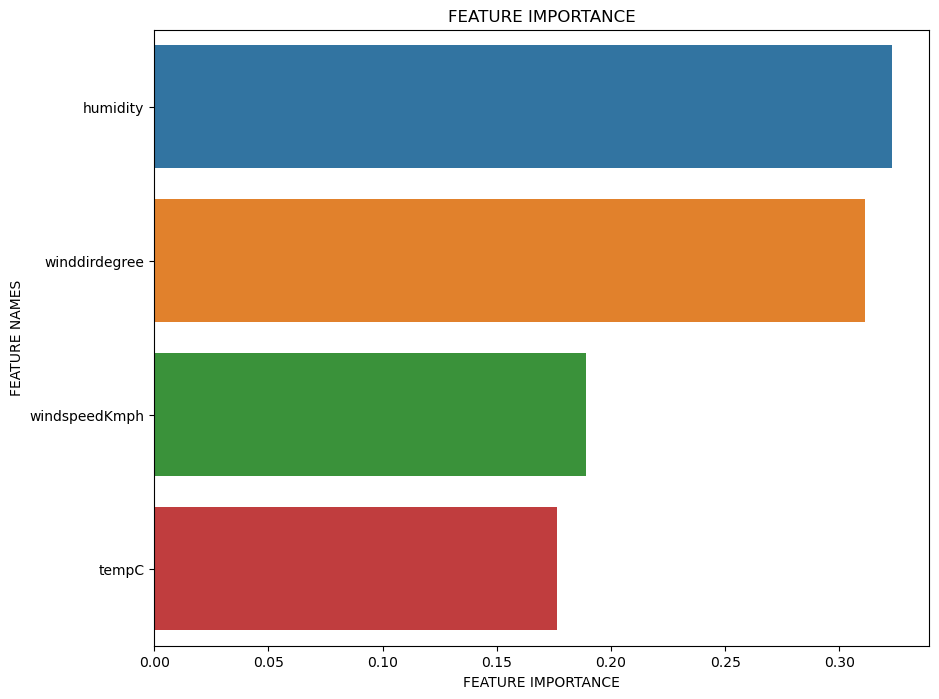

In [22]:
plot_feature_importance(model.feature_importances_, df.columns)

# RF_SO2

In [29]:
#define train and test
# 80% for train and 20% for test
train_data = data[0:int(len(data)*0.8),9:13]
train_labels = data[0:int(len(data)*0.8),4]
test_data = data[int(len(data)*0.8):int(len(data)),9:13]
test_labels = data[int(len(data)*0.8):int(len(data)),4]

train_data = np.array(train_data, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print("Training set: {}".format(train_data.shape))  # 7008 examples, 4 features
print("Testing set:  {}".format(test_data.shape))   # 1752 examples, 4 features

Training set: (7008, 4)
Testing set:  (1752, 4)


In [30]:
column_names = ['windspeedKmph', 'winddirdegree', 'tempC', 'humidity']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,windspeedKmph,winddirdegree,tempC,humidity
0,3.0,253.0,8.0,85.0
1,4.0,275.0,7.0,83.0
2,5.0,298.0,7.0,81.0
3,6.0,320.0,7.0,80.0
4,6.0,325.0,7.0,79.0


## 1. Build the model

In [31]:
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':700,
              'criterion':'mse', 
              #'ccp_alpha':0.001,
              'max_depth': 10,
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True,
              'max_features':None}

In [32]:
model = RandomForestRegressor(**params_rfr)

In [33]:
%%time
model.fit(train_data, train_labels)

/Users/yangruoxi/opt/anaconda3/envs/keras/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 4.23 s, sys: 44.7 ms, total: 4.27 s
Wall time: 4.28 s


RandomForestRegressor(criterion='mse', max_depth=10, max_features=None,
                      n_estimators=700)

## 2. Predict

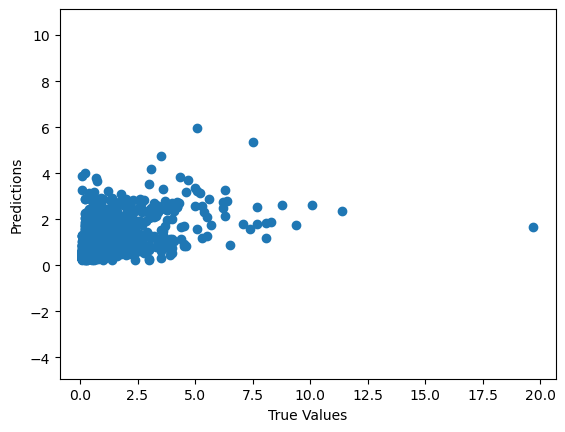

In [34]:
test_predictions = model.predict(test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()
#_ = plt.plot([-100, 100], [-100, 100])

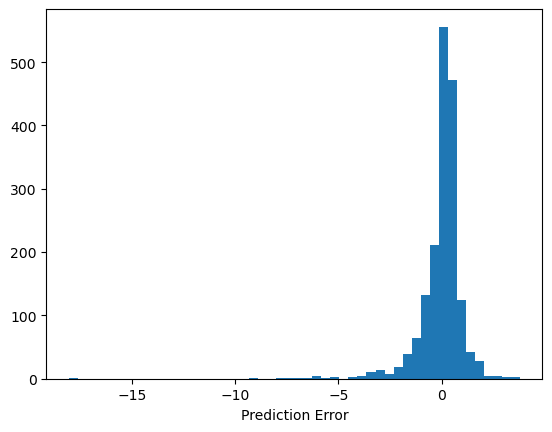

In [35]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()
#_ = plt.ylabel("Count")

In [36]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 1.2250767204228141


In [37]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

0.20232948950656138

## 3. Feature importantce

In [38]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

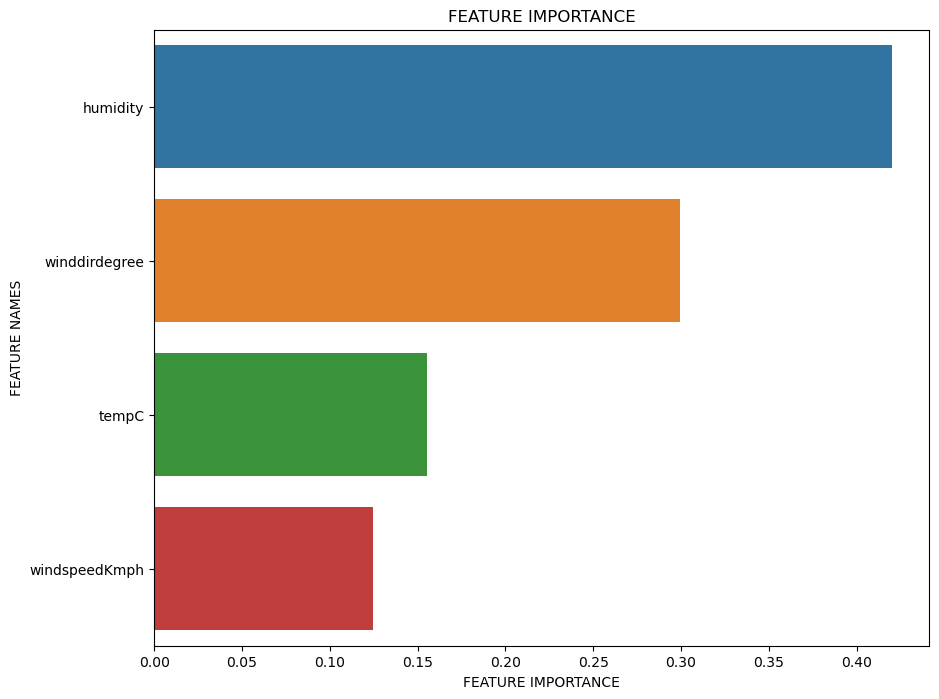

In [39]:
plot_feature_importance(model.feature_importances_, df.columns)